In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.io as pio

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
df=pd.read_csv('/content/data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750,NaN


In [12]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

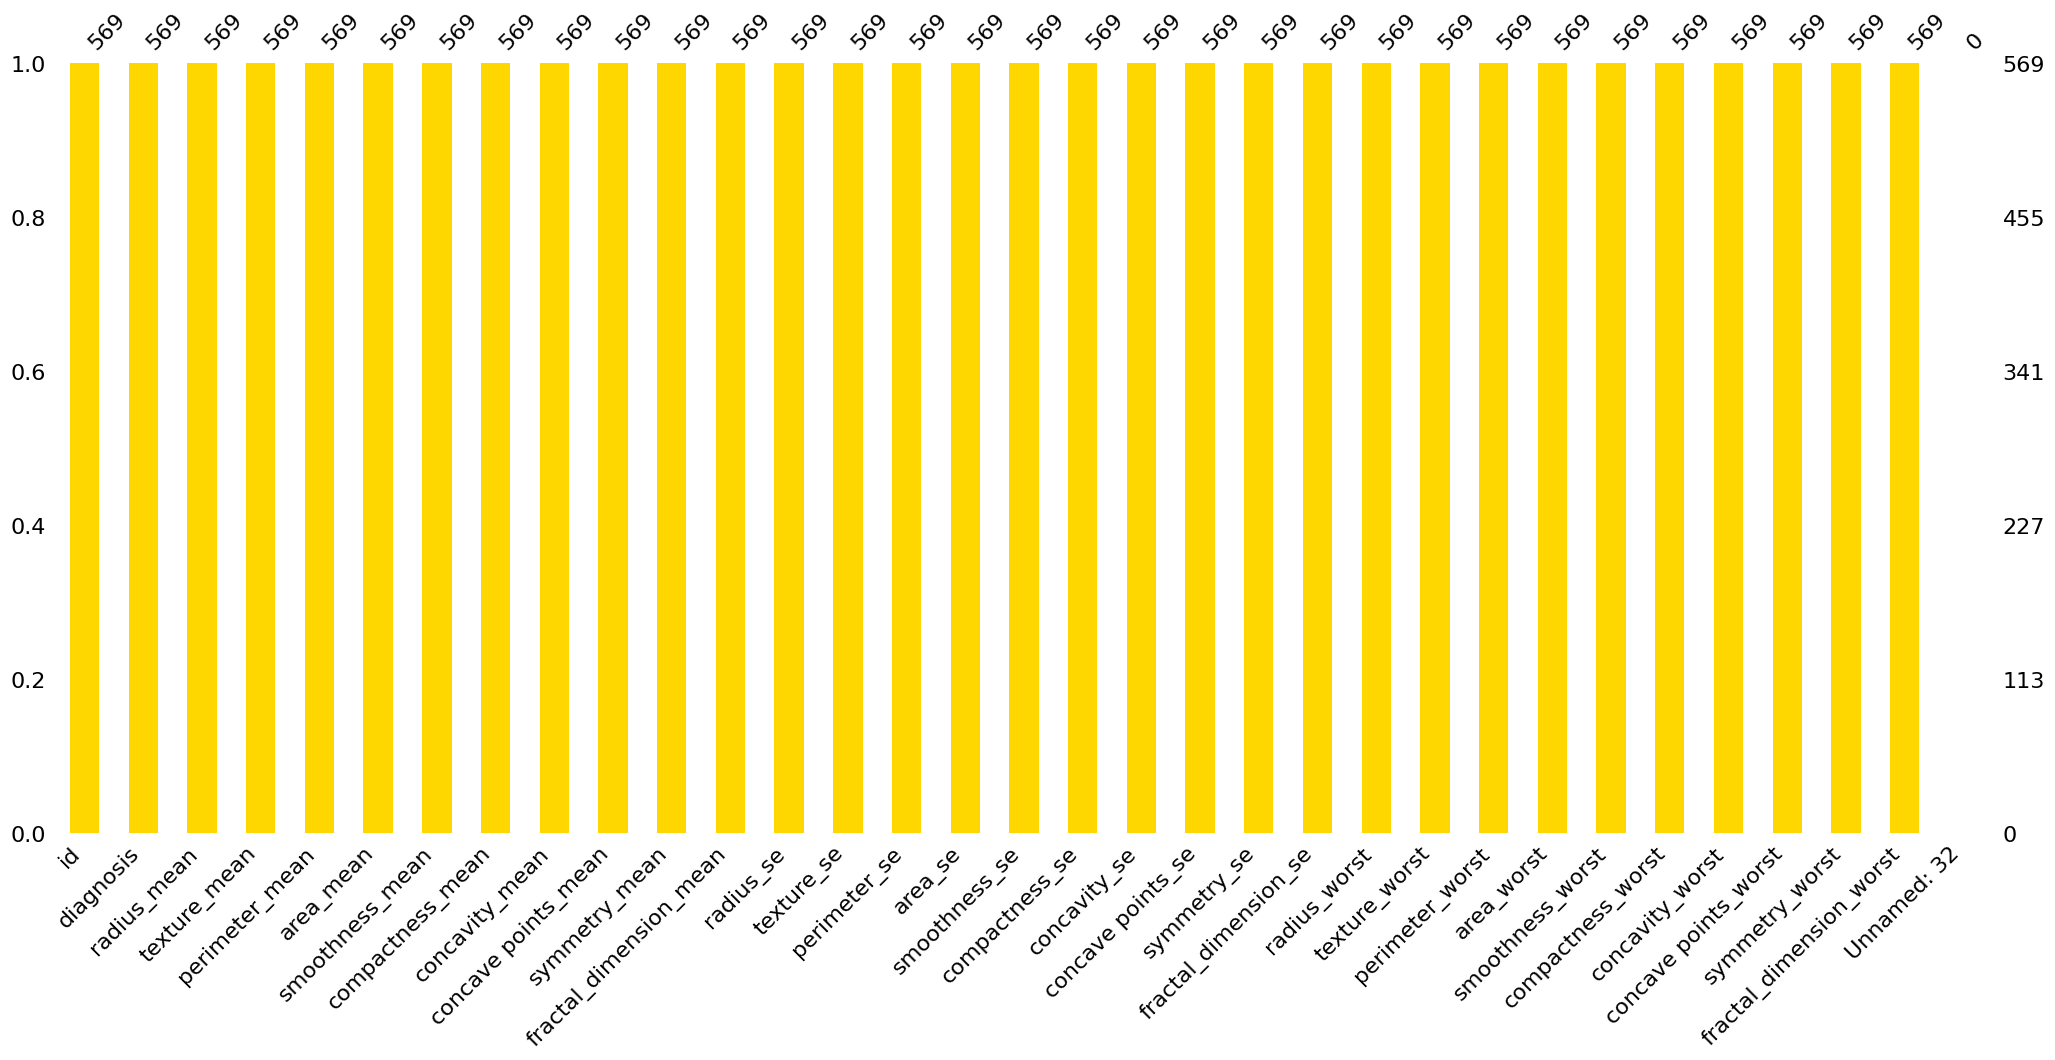

In [14]:
n = msno.bar(df,color='gold')

In [16]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [15]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

dropping unnecessary columns

In [17]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

Visualizations

<Axes: >

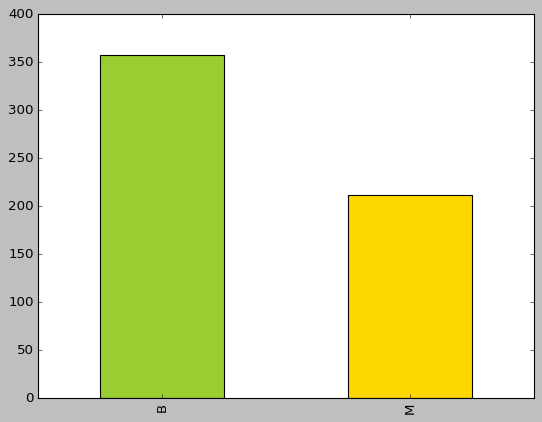

In [18]:
plt.rcParams['figure.figsize']=(10,8)
plt.style.use("classic")
color = ['yellowgreen','gold']
df['diagnosis'].value_counts().plot.bar(color=color)

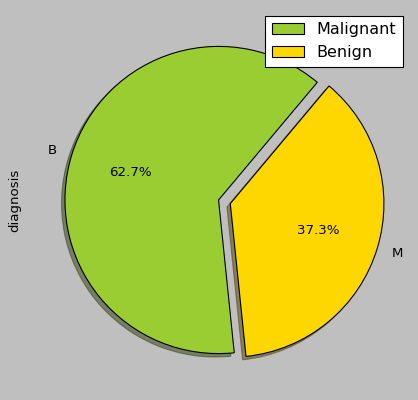

In [19]:
plt.rcParams['figure.figsize']=(10,8)
plt.style.use("classic")
color = ['yellowgreen','gold']
labels =['Malignant','Benign']
df['diagnosis'].value_counts().plot.pie(y="diagnosis",colors=color,explode=(0,0.08),startangle=50,shadow=True,autopct="%0.1f%%")
plt.legend(labels,loc='best')
plt.axis('on');

In [24]:
pio.templates.default = 'plotly_dark'
def create_hist(xval,color):
   fig = px.histogram(df,x=xval,color=color,title=xval,color_discrete_sequence = ['yellowgreen','gold'],width=600,height=300)
   fig.show()

In [25]:
create_hist('radius_mean','diagnosis')
create_hist('texture_mean','diagnosis')
create_hist('perimeter_mean','diagnosis')
create_hist('area_mean','diagnosis')
create_hist('smoothness_mean','diagnosis')

In [26]:
pio.templates.default = 'plotly_dark'
def create_scatter(xval,yval):
    fig = px.scatter(df,x=xval,y=yval,color='diagnosis',title =xval +" "+"vs"+" "+ yval, color_discrete_sequence = ['yellowgreen','gold'],width=600,height=300)
    fig.show()
    
create_scatter('radius_mean','texture_mean')
create_scatter('texture_mean','perimeter_mean')
create_scatter('perimeter_mean','area_mean')
create_scatter('area_mean','smoothness_mean')
create_scatter('smoothness_mean','compactness_mean')

worst case

In [27]:
create_scatter('radius_worst','texture_worst')
create_scatter('texture_worst','perimeter_worst')
create_scatter('perimeter_worst','area_worst')
create_scatter('area_worst','smoothness_worst')
create_scatter('smoothness_worst','compactness_worst')

Comparing 3 variables

In [28]:
pio.templates.default = 'plotly_dark'
def create_3dscatter(xval,yval,zval):
    fig = px.scatter_3d(df,x=xval,y=yval,z=zval,color='diagnosis',title =xval +" "+"vs"+" "+ yval+" "+"vs"+" "+ zval, color_discrete_sequence = ['yellowgreen','gold','lightcoral'])
    fig.show()
    
create_3dscatter('radius_worst','texture_worst','perimeter_worst')
create_3dscatter('area_worst','smoothness_worst','compactness_worst')

Spliting the dataset into train-test

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']
le = LabelEncoder()
y = le.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [30]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Import necessary Libraries for Building CNN

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [33]:
x_train = x_train.reshape(455,30,1)
x_test = x_test.reshape(114,30,1);

In [34]:
x_train.shape

(455, 30, 1)

Building CNN

In [35]:
epochs=50
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

Compiling the Model

In [37]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

Train the Model

In [38]:
history = model.fit(x_train,y_train,epochs=60,validation_data=(x_test,y_test),verbose=1)

Epoch 1/60
15/15 [==============================] - 3s 31ms/step - loss: 0.3449 - accuracy: 0.8637 - val_loss: 0.3709 - val_accuracy: 0.9474
Epoch 2/60
15/15 [==============================] - 0s 13ms/step - loss: 0.1845 - accuracy: 0.9538 - val_loss: 0.3108 - val_accuracy: 0.9561
Epoch 3/60
15/15 [==============================] - 0s 12ms/step - loss: 0.1150 - accuracy: 0.9582 - val_loss: 0.3021 - val_accuracy: 0.9649
Epoch 4/60
15/15 [==============================] - 0s 14ms/step - loss: 0.0870 - accuracy: 0.9714 - val_loss: 0.2785 - val_accuracy: 0.9474
Epoch 5/60
15/15 [==============================] - 0s 13ms/step - loss: 0.0761 - accuracy: 0.9692 - val_loss: 0.2571 - val_accuracy: 0.9386
Epoch 6/60
15/15 [==============================] - 0s 14ms/step - loss: 0.0678 - accuracy: 0.9736 - val_loss: 0.2305 - val_accuracy: 0.9474
Epoch 7/60
15/15 [==============================] - 0s 12ms/step - loss: 0.0716 - accuracy: 0.9758 - val_loss: 0.2059 - val_accuracy: 0.9474
Epoch 8/60
15

In [39]:
history.history

{'loss': [0.3448987901210785,
  0.18447476625442505,
  0.11499284207820892,
  0.08696632087230682,
  0.07612098753452301,
  0.06777630746364594,
  0.07158694416284561,
  0.06738553941249847,
  0.04665561392903328,
  0.07411067187786102,
  0.05188777670264244,
  0.09722878783941269,
  0.057881392538547516,
  0.04940161108970642,
  0.040926191955804825,
  0.03386722505092621,
  0.057992588728666306,
  0.0739477351307869,
  0.039735011756420135,
  0.05526440963149071,
  0.04936873912811279,
  0.04552331939339638,
  0.032696016132831573,
  0.0495222769677639,
  0.05124513804912567,
  0.01816292479634285,
  0.03343120589852333,
  0.03146043047308922,
  0.05633048713207245,
  0.053372275084257126,
  0.02966172993183136,
  0.05469951778650284,
  0.018443746492266655,
  0.031345050781965256,
  0.04760264977812767,
  0.02772234007716179,
  0.03874099999666214,
  0.021533403545618057,
  0.026247680187225342,
  0.028132634237408638,
  0.026837924495339394,
  0.045334234833717346,
  0.007181934546

Plotting Learning Curve

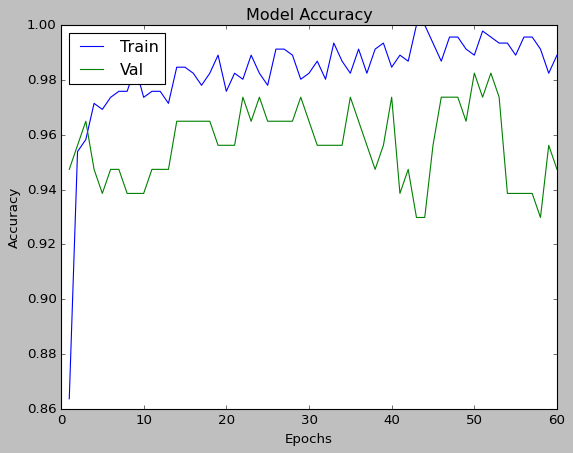

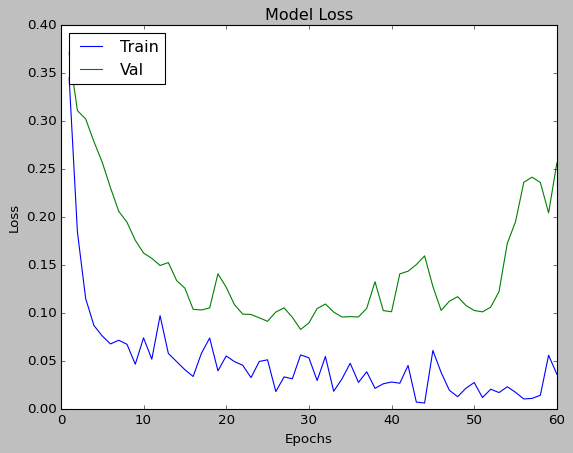

In [40]:
epoch_range= range(1,61)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

epoch_range= range(1,61)
plt.plot(epoch_range,history.history['loss'])
plt.plot(epoch_range,history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend(['Train','Val'],loc='upper left')
plt.show()


In [3]:
pip install tensorflow.keras.models 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow.keras.models (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.models


In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/project.hdf5')